In [1]:
import os
import pandas
from openbb_terminal.sdk import openbb
import pyfolio as pf
import warnings

warnings.filterwarnings("ignore")

In [2]:
# settings to locate excel path
dirname = os.path.dirname
__file__ = os.path.abspath('')

# locate and define excel path
excel_file_path = os.path.join(dirname(dirname(__file__)),"input/portfolio_data.xlsx") # change to your input excel path
benchmark_symbol = "0820EA.KL" # change the benchmark you want, for example SPY

In [6]:
# Load portfolio data from ".xlsx" excel file 
# introductory of openbb: https://algotrading101.com/learn/openbb-guide/
p = openbb.portfolio.load(transactions_file_path = excel_file_path)
p.set_benchmark(benchmark_symbol) # set benchmark

## calculate daily return of your portfolio
daily_returns = openbb.portfolio.dret(portfolio_engine=p) 
## change the date string to datetime format
daily_returns.index = pandas.to_datetime(daily_returns.index) 
## change the column name from "benchmark" to the benchmark symbol you set
daily_returns.rename(columns={"benchmark":benchmark_symbol}, inplace=True) 

Start date,2020-10-14
End date,2023-07-28
Total months,34
,Backtest
Annual return,-6.52%
Cumulative returns,-17.609%
Annual volatility,20.668%
Sharpe ratio,-0.22
Calmar ratio,-0.23
Stability,0.47
Max drawdown,-28.332%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,23.55,2020-12-03,2022-10-17,NaT,NaN
1,7.83,2020-11-17,2020-11-24,2020-12-03,13
2,3.21,2020-11-12,2020-11-13,2020-11-16,3
3,2.76,2020-10-26,2020-10-30,2020-11-09,11
4,1.84,2020-10-21,2020-10-22,2020-10-26,4


Stress Events,mean,min,max
Covid,-0.02%,-20.54%,9.29%


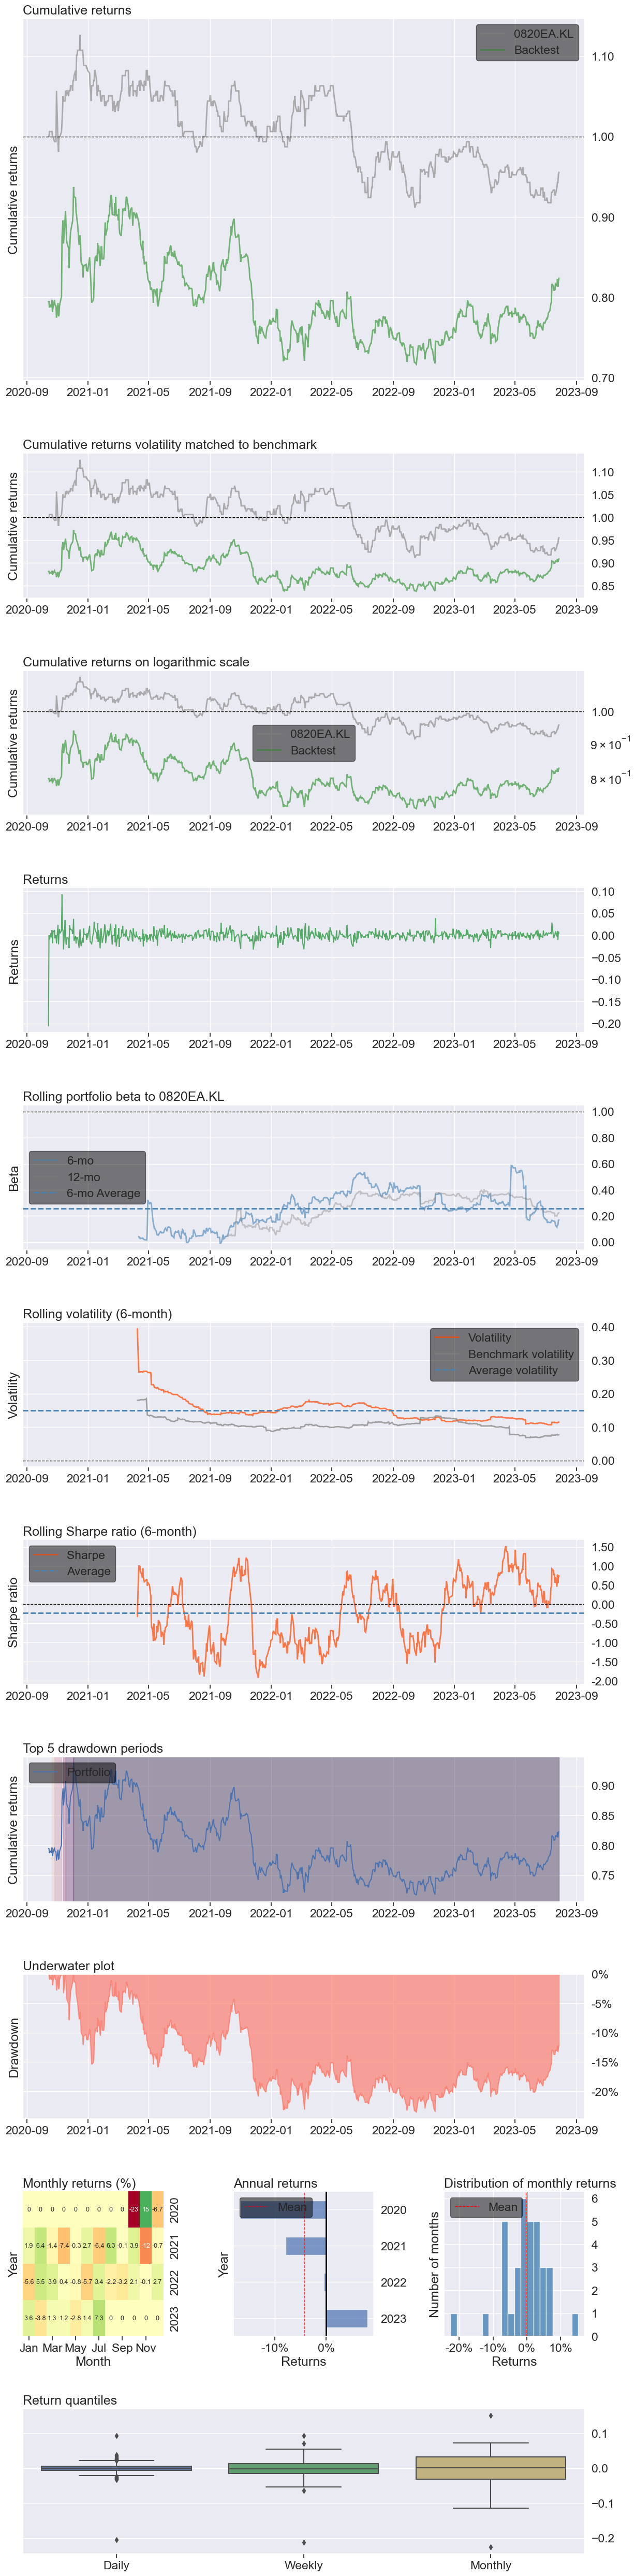

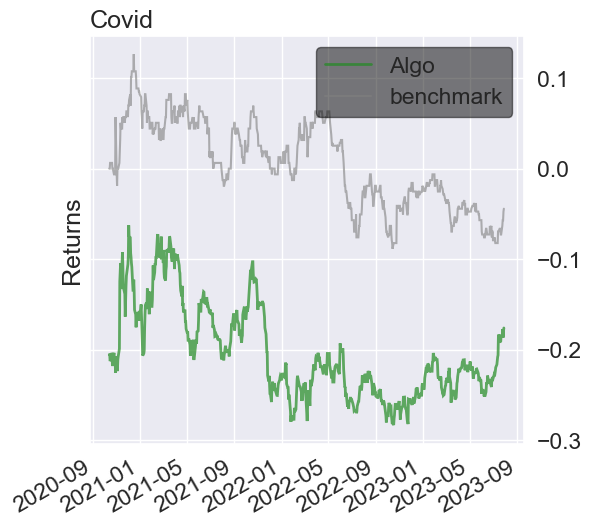

In [59]:
pf.create_full_tear_sheet(returns=daily_returns["portfolio"],benchmark_rets=daily_returns[benchmark_symbol])